In [13]:
#Lets's import some of the more relevant packages we are going to need to use.

from bs4 import BeautifulSoup
import requests
import unicodedata
import numpy as np
import pandas as pd
import os

In [14]:
#Since NED has a drop down menu Region --> Countries (or Regional Programs)
#we'll have to import selenium to click around for us. 

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


#set our webdriver preferences, I am using Firefox. 

mime_types = "application/pdf,application/vnd.adobe.xfdf,application/vnd.fdf,application/vnd.adobe.xdp+xml"

fp = webdriver.FirefoxProfile()
fp.set_preference("browser.download.folderList", 2)
fp.set_preference("browser.download.manager.showWhenStarting", False)
fp.set_preference("browser.download.dir", os.getcwd())
fp.set_preference("browser.helperApps.neverAsk.saveToDisk", mime_types)
fp.set_preference("plugin.disable_full_page_plugin_for_types", mime_types)
fp.set_preference("pdfjs.disabled", True)



browser = webdriver.Firefox(firefox_profile=fp)
wait = WebDriverWait(browser, 10)

#These drop-wond options I just grabbed from the ned.regions page. 

options=['Africa', 'Asia', 'Central and Eastern Europe', 'Eurasia', 'Global 2019', 
         'Latin America and Caribbean', 'Middle East and Northern Africa']

#I am creating a list to append all the country/ regional program urls into

country_url=[]

#here we go!

for option in options: 
    browser = webdriver.Firefox(firefox_profile=fp)
    browser.get('https://www.ned.org/regions/')
    elm=browser.find_element_by_class_name('jqTransformSelectOpen')    
    elm.click()
    
    wait
    my_select = browser.find_element_by_partial_link_text(option)
    my_select.click()
    
    wait
    responsa = browser.page_source
    soup_cl=BeautifulSoup(responsa,'html.parser')

    table = soup_cl.find_all('option',attrs={'value':True})

    for thing in table: 
        country_url.append(thing['value'])

    browser.close()

country_url

['',
 'https://www.ned.org/region/africa/angola-2019/',
 'https://www.ned.org/region/africa/burkina-faso-2019/',
 'https://www.ned.org/region/africa/burundi-2019/',
 'https://www.ned.org/region/africa/cameroon-2019/',
 'https://www.ned.org/region/africa/central-african-republic-2019/',
 'https://www.ned.org/region/africa/chad-2019/',
 'https://www.ned.org/region/africa/congo-democratic-republic-2018/',
 'https://www.ned.org/region/africa/congo-democratic-republic-2019/',
 'https://www.ned.org/region/africa/cote-divoire-2019/',
 'https://www.ned.org/region/africa/djibouti-2019/',
 'https://www.ned.org/region/africa/east-africa-regional-2018/',
 'https://www.ned.org/region/africa/equatorial-guinea-2019/',
 'https://www.ned.org/region/africa/eritrea-2019/',
 'https://www.ned.org/region/africa/eswatini-2019/',
 'https://www.ned.org/region/africa/ethiopia-2019/',
 'https://www.ned.org/region/africa/gambia-2019/',
 'https://www.ned.org/region/africa/guinea-2019/',
 'https://www.ned.org/regio

In [15]:

#there some white spaces in the country_url list, let's get rid of them. 
country_urls = [i for i in country_url if i]

#Lets enumerate here to see how many urls we got.
[ print(n,i) for n,i in enumerate (country_urls)];

0 https://www.ned.org/region/africa/angola-2019/
1 https://www.ned.org/region/africa/burkina-faso-2019/
2 https://www.ned.org/region/africa/burundi-2019/
3 https://www.ned.org/region/africa/cameroon-2019/
4 https://www.ned.org/region/africa/central-african-republic-2019/
5 https://www.ned.org/region/africa/chad-2019/
6 https://www.ned.org/region/africa/congo-democratic-republic-2018/
7 https://www.ned.org/region/africa/congo-democratic-republic-2019/
8 https://www.ned.org/region/africa/cote-divoire-2019/
9 https://www.ned.org/region/africa/djibouti-2019/
10 https://www.ned.org/region/africa/east-africa-regional-2018/
11 https://www.ned.org/region/africa/equatorial-guinea-2019/
12 https://www.ned.org/region/africa/eritrea-2019/
13 https://www.ned.org/region/africa/eswatini-2019/
14 https://www.ned.org/region/africa/ethiopia-2019/
15 https://www.ned.org/region/africa/gambia-2019/
16 https://www.ned.org/region/africa/guinea-2019/
17 https://www.ned.org/region/africa/kenya-2019/
18 https:/

In [16]:
#there were a couple of regions/ countries who had either etra white spaces of for some reason or another
#they weren't working as part of the loop above. Simple! I just did them by themselves. 

not_even=['https://www.ned.org/region/asia/thailand-2019/','https://www.ned.org/region/africa/burkina-faso-2019/','https://www.ned.org/region/africa/cameroon-2019/','https://www.ned.org/region/africa/regional-west-africa-2019/']
other_issue=  ['https://www.ned.org/region/central-and-eastern-europe/europe-regional-2019/',
         'https://www.ned.org/region/latin-america-and-caribbean/venezuela-2019/','https://www.ned.org/region/middle-east-and-northern-africa/yemen-2019/',
          ]

#Lets enumerate here again,again get a filters 'country_urls' list.

country_urls= [i for i in country_urls if i not in not_even]
country_urls_num=[(n,i) for n,i in enumerate(country_urls) if i not in not_even]
country_urls_num



[(0, 'https://www.ned.org/region/africa/angola-2019/'),
 (1, 'https://www.ned.org/region/africa/burundi-2019/'),
 (2, 'https://www.ned.org/region/africa/central-african-republic-2019/'),
 (3, 'https://www.ned.org/region/africa/chad-2019/'),
 (4, 'https://www.ned.org/region/africa/congo-democratic-republic-2018/'),
 (5, 'https://www.ned.org/region/africa/congo-democratic-republic-2019/'),
 (6, 'https://www.ned.org/region/africa/cote-divoire-2019/'),
 (7, 'https://www.ned.org/region/africa/djibouti-2019/'),
 (8, 'https://www.ned.org/region/africa/east-africa-regional-2018/'),
 (9, 'https://www.ned.org/region/africa/equatorial-guinea-2019/'),
 (10, 'https://www.ned.org/region/africa/eritrea-2019/'),
 (11, 'https://www.ned.org/region/africa/eswatini-2019/'),
 (12, 'https://www.ned.org/region/africa/ethiopia-2019/'),
 (13, 'https://www.ned.org/region/africa/gambia-2019/'),
 (14, 'https://www.ned.org/region/africa/guinea-2019/'),
 (15, 'https://www.ned.org/region/africa/kenya-2019/'),
 (16, 

In [19]:
#Here is my doing the loops for the countries/regions that weren't workign out before.
#I ran not_even and other issue

x=0
country_info=[]

#I would switch this list and the request.get(x) below as needed.

for country in other_issue:

    response = requests.get(country)
    soup=BeautifulSoup(response.text,'html.parser')
    posts = soup.find_all('p')
    
    for post in posts:
        if "1025 F Street NW. Suite 800, Washington DC 20004" in post:
            continue

        
        else:
            country_info.append(post.text.strip())
            x=x+1
                
            if x%4==0:
                country_info.append(soup.title.text.strip())
            else:
                continue 

country_info 

['International Republican Institute (IRI)',
 '$260,637',
 'To build the skills of parliamentarians in Ukraine, Moldova, and Armenia to represent their constituencies, develop policies that deliver needed reforms, and effectively communicate progress made toward addressing critical issues. The institute will conduct legislative exchanges, bringing parliamentarians from the target countries to Vilnius to learn from their counterparts in the Lithuanian Seimas (parliament) as well as follow-up exchanges that bring Seimas representatives to the partner parliaments to focus on strategic communication aimed at advancing priority reforms and increasing citizen trust.',
 'Counter Disinformation among Vulnerable Populations in Central Europe',
 'Europe Regional 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY',
 'Transitions Online',
 '$75,000',
 'To counter disinformation among vulnerable populations in Central Europe. The Czech organization, together with local partners in Poland, Slovakia, and Hungar

In [ ]:
#same here, testing for conutry/region that presented some unique issue with the loop
#I skipped the cells I ran according to the excel, country data I wanted to extract

country_info=[]

response = requests.get('https://www.ned.org/region/africa/regional-west-africa-2019/')
soup=BeautifulSoup(response.text,'html.parser')
posts = soup.find_all('p')
    
for post in posts:
    
    if "1025 F Street NW. Suite 800, Washington DC 20004" in post:
        continue
      
    else:
        country_info.append(post.text.strip())
      


In [20]:
filter_object = filter(lambda x: x != "", country_info)

country_info = list(filter_object)

In [22]:
#Below are some other back&forth operations I conducted to clean the data


#country_info.index('Engagement for Confidence Building')
#country_info[5345:5349]
#country_info.insert(0, 'BUILDING THE SKILLS OF PARLIAMENTARIANS')
#country_info=country_info[:9180]
len(country_info)

439

In [47]:
#country_info[-1]

In [24]:
country_info.append('yay1')
#country_info.append('yay2')
#country_info.append('yay2')
#country_info.append('yay2')
len(country_info)

440

In [25]:
data = np.array(country_info)
shape = ( 88, 5)
data=data.reshape(shape)

print(data)

[['International Republican Institute (IRI)' '$260,637'
  'To build the skills of parliamentarians in Ukraine, Moldova, and Armenia to represent their constituencies, develop policies that deliver needed reforms, and effectively communicate progress made toward addressing critical issues. The institute will conduct legislative exchanges, bringing parliamentarians from the target countries to Vilnius to learn from their counterparts in the Lithuanian Seimas (parliament) as well as follow-up exchanges that bring Seimas representatives to the partner parliaments to focus on strategic communication aimed at advancing priority reforms and increasing citizen trust.'
  'Counter Disinformation among Vulnerable Populations in Central Europe'
  'Europe Regional 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY']
 ['Transitions Online' '$75,000'
  'To counter disinformation among vulnerable populations in Central Europe. The Czech organization, together with local partners in Poland, Slovakia, and Hungary,

In [26]:
df=pd.DataFrame(data,columns=['1','2','3','4','5'])
df.head(10)

,1,2,3,4,5
0,International Republican Institute (IRI),"$260,637",To build the skills of parliamentarians in Ukr...,Counter Disinformation among Vulnerable Popula...,Europe Regional 2019 - NATIONAL ENDOWMENT FOR ...
1,Transitions Online,"$75,000",To counter disinformation among vulnerable pop...,Creating Enabling Environments for Constructiv...,Europe Regional 2019 - NATIONAL ENDOWMENT FOR ...
2,Center for International Private Enterprise (C...,"$999,285",To enhance local stakeholders’ engagement in p...,Defending Democratic Institutions,Europe Regional 2019 - NATIONAL ENDOWMENT FOR ...
3,International Republican Institute (IRI),"$800,000",To help traditional and emerging parties in EU...,Expanding a Knowledge and Resource Hub to Figh...,Europe Regional 2019 - NATIONAL ENDOWMENT FOR ...
4,Solidarity Center (SC),"$280,000",To build the capacities of trade unions and ci...,Fostering Democratic Values in Central Europe,Europe Regional 2019 - NATIONAL ENDOWMENT FOR ...
5,Res Publica Foundation,"$90,000",To foster regional dialogue that promotes and ...,Increasing the Integrity of Elections in Centr...,Europe Regional 2019 - NATIONAL ENDOWMENT FOR ...
6,MEMO 98,"$80,000",To improve the integrity of elections in Centr...,Monitoring China’s Influence and Its Impact on...,Europe Regional 2019 - NATIONAL ENDOWMENT FOR ...
7,AcaMedia,"$89,900",To strengthen understanding of China’s growing...,Promoting Democratic Discourse in Central Europe,Europe Regional 2019 - NATIONAL ENDOWMENT FOR ...
8,Project Forum,"$53,000",To promote democratic ideas and values in Cent...,Promoting Democratic Values among Youth,Europe Regional 2019 - NATIONAL ENDOWMENT FOR ...
9,MESA10,"$136,000",To foster the engagement of youth in bolsterin...,Promoting European and Transatlantic Dialogue,Europe Regional 2019 - NATIONAL ENDOWMENT FOR ...


In [27]:
#I export to see where there is are other mistakes

df.to_csv(r'C:\Users\dccam\Desktop\export_1.csv')

In [29]:
df = pd.read_csv('import_1.csv',sep=',')
df

,name_of_project,country,partner,grant,description
0,Defending Fundamental Rights in the Lunda Prov...,Angola 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY,Associacao Maos Livres,50000,To better protect the local population from th...
1,Encouraging Greater Dialogue Between Elected O...,Angola 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY,Friends of Angola,55577,To bring parliamentarians closer to their cons...
2,Mobilizing Women for the Local Elections,Angola 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY,Plataforma Mulheres em Accao,40000,To enhance womenâ€™s overall political partici...
3,Promoting Freedom of Expression and of the Press,Angola 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY,Observatorio da Imprensa e da Comunicacao,38534,To spark a national debate on freedom of expre...
4,Promoting Transparency in the Management of Pu...,Angola 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY,National Counselling Centre,41015,To strengthen civil societyâ€™s capacity to pr...
...,...,...,...,...,...
1911,Promoting Democratic Values through Film,Yemen 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY,Yemen Will Triumph,23000,To promote democratic values and education thr...
1912,Restoring Independent Media,Yemen 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY,Thakera for Media Production,25000,To help rebuild Yemenâ€™s independent media se...
1913,Strengthening Accountability,Yemen 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY,Resonate Yemen,50000,To strengthen accountability through civic eng...
1914,Strengthening Civil Society Coordination and S...,Yemen 2019 - NATIONAL ENDOWMENT FOR DEMOCRACY,The Project on Middle East Democracy,85000,To strengthen civil society organizationsâ€™ (...


In [30]:
for thing in df['grant']:
    if 'Supplement:' in thing:
        x=df[df['grant']==thing].index[0]
        df['grant'].iloc[x]=thing[13:]
        print(thing[13:])


22,145
27,000
10,000
29,000
200,000
12,000
25,000
15,000
16,000
1,000
20,000
2,500
10,000
5,000
20,000
75,000
75,000
21,000
40,000
18,000
25,000
33,400
10,000
10,000
50,000
4,300
5,090
10,000
3,426
23,073
15,000
11,930
21,500
10,000
14,705
870
31,000
12,000
20,000
20,000
10,400
25,000
25,000
25,000
17,000
75,000
25,000
35,000
45,000
55,000
70,000
7,700
3,990
200,000
11,816
30,000
22,880
14,050
10,650
14,480
15,070
14,700
17,473
20,000
7,473
14,368
33,500
13,825
12,175
4,273
40,332
29,900
15,000
10,450
50,000
9,500
60,000
8,000
5,885
12,500
34,500
62,000
20,000
30,000
15,000
20,000
23,430
15,600


In [31]:
df['grant'].iloc[120]

'22,145'

In [32]:
for thing in df['grant']:
    if ',' in thing:
        x=df[df['grant']==thing].index[0]
        df['grant'].iloc[x]=thing.replace(',','')
        print(thing)


22,145
27,000
10,000
29,000
200,000
12,000
25,000
15,000
16,000
1,000
20,000
2,500
10,000
5,000
20,000
75,000
75,000
21,000
40,000
18,000
25,000
33,400
10,000
10,000
50,000
4,300
5,090
10,000
3,426
23,073
15,000
11,930
21,500
10,000
14,705
31,000
12,000
20,000
20,000
10,400
25,000
25,000
25,000
17,000
75,000
25,000
35,000
45,000
55,000
70,000
7,700
3,990
200,000
11,816
30,000
22,880
14,050
10,650
14,480
15,070
14,700
17,473
20,000
7,473
14,368
33,500
13,825
12,175
4,273
40,332
29,900
15,000
10,450
50,000
9,500
60,000
Supplement to 2018-1283 $40,000
8,000
5,885
12,500
34,500
62,000
20,000
30,000
15,000
20,000
23,430
15,600


In [33]:
df['grant'].iloc[120]

'22145'

In [34]:
df[df['grant']=='Supplement to 2018-1283 $40000'].index
df.iloc[1459]['grant']=40000

In [36]:
df.to_csv(r'C:\Users\dccam\Desktop\export_2.csv')

In [37]:
df = pd.read_csv('import_2.csv',sep=',')


In [38]:
country_year=[]

for country in df['country']:
    country_year.append(country.split('-')[0])
    
df['country']=country_year


In [39]:
#df['country'].unique()

In [40]:
just_country=[]
just_year=[]

for country in df['country']:
    just_country.append(country[:-5])
    just_year.append(country[-5:])

In [41]:
df['country']=just_country
df['year']=just_year

In [42]:
df.head()

,name_of_project,country,partner,grant,description,year
0,Defending Fundamental Rights in the Lunda Prov...,Angola,Associacao Maos Livres,50000,To better protect the local population from th...,2019
1,Encouraging Greater Dialogue Between Elected O...,Angola,Friends of Angola,55577,To bring parliamentarians closer to their cons...,2019
2,Mobilizing Women for the Local Elections,Angola,Plataforma Mulheres em Accao,40000,To enhance womenâ€™s overall political partici...,2019
3,Promoting Freedom of Expression and of the Press,Angola,Observatorio da Imprensa e da Comunicacao,38534,To spark a national debate on freedom of expre...,2019
4,Promoting Transparency in the Management of Pu...,Angola,National Counselling Centre,41015,To strengthen civil societyâ€™s capacity to pr...,2019


In [43]:
df[df['partner']=='National Democratic Institute for International Affairs (NDI)'].count()

name_of_project    43
country            43
partner            43
grant              43
description        43
year               43
dtype: int64

In [44]:
from unidecode import unidecode

df['partner']=df['partner'].astype(str)
df['partner']=df['partner'].apply(unidecode)

df['description']=df['description'].astype(str)
df['description']=df['description'].apply(unidecode)

df[df['partner']=='National Democratic Institute for International Affairs (NDI)'].count()

name_of_project    43
country            43
partner            43
grant              43
description        43
year               43
dtype: int64

In [45]:
#after cleaning so much, I want to make sure we minimize the number of orgs that are repeated under different names

from fuzzywuzzy import process, fuzz

In [49]:
unique_fuzz=list(df['partner'].astype(str).unique())


In [50]:
df['year']=df['year'].str.strip()

In [52]:
#I tried separating out year from the 'country' columns, some elem don't have years!

df['year'].astype(str).unique()

array(['2019', '2018', 'ROPE', 'USIA'], dtype=object)

In [53]:
df[df['year']==2024]

,name_of_project,country,partner,grant,description,year


In [54]:
df[df['year']==2019]

,name_of_project,country,partner,grant,description,year


In [55]:
df['country'].unique()

array(['Angola ', 'Burundi ', 'Central African Republic ', 'Chad ',
       'Congo, Democratic Republic ', 'Cote DIvoire ', 'DJIBOUTI ',
       'EAST AFRICA REGIONAL ', 'Equatorial Guinea ', 'Eritrea ',
       'ESWATINI ', 'Ethiopia ', 'Gambia ', 'Guinea ', 'Kenya ',
       'Lesotho ', 'LIBERIA ', 'Malawi ', 'MALI ', 'NIGER ', 'NIGERIA ',
       'REGIONAL: AFRICA ', 'REGIONAL: CENTRAL AFRICA ',
       'REGIONAL: SOUTHERN AFRICA ', 'RWANDA ', 'SIERRA LEONE ',
       'SOMALIA ', 'SOMALILAND ', 'SOUTH SUDAN ', 'SUDAN ', 'TANZANIA ',
       'TOGO ', 'UGANDA ', 'ZIMBABWE ', 'Asia Regional ', 'BANGLADESH ',
       'BURMA ', 'CAMBODIA ', 'CHINA REGIONAL ', 'HONG KONG (CHINA) ',
       'INDONESIA ', 'MAINLAND CHINA ', 'MALAYSIA ', 'Maldives ',
       'MONGOLIA ', 'NEPAL ', 'NORTH KOREA ', 'PAKISTAN ', 'PHILIPPINES ',
       'REGIONAL: ASIA ', 'REGIONAL: SOUTH ASIA ', 'South Asia Regional ',
       'Southeast Asia Regional ', 'SRI LANKA ', 'TIBET (CHINA) ',
       'VIETNAM ', 'XINJIANG / EAST TU

In [56]:
ROPE_REPLACE_LIST=list(df[df['year']=='ROPE'].index)

In [57]:
for index in ROPE_REPLACE_LIST:
    df['year'].iloc[index]='unknown'

C:\Users\dccam\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
df['year'].unique()

array(['2019', '2018', 'unknown', 'USIA'], dtype=object)

In [59]:
LIST_REPLACE_R=df[df['country']=='R'].index
LIST_REPLACE_R

Int64Index([1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
            1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110,
            1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121,
            1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132,
            1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
            1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154,
            1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165,
            1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176,
            1177, 1178, 1179, 1180],
           dtype='int64')

In [60]:
for index in LIST_REPLACE_R:
    df['country'].iloc[index]='Russia'
    df['year'].iloc[index]='unknown'

In [61]:
df['year'].unique()

array(['2019', '2018', 'unknown'], dtype=object)

In [62]:
df['grant']=df['grant'].astype(int)

In [68]:
#now we have the grants as integers, the strings of names of country makesense
# and if there is no year, we have labelled it as 'unknown'
df['country'].unique()

array(['Angola ', 'Burundi ', 'Central African Republic ', 'Chad ',
       'Congo, Democratic Republic ', 'Cote DIvoire ', 'DJIBOUTI ',
       'EAST AFRICA REGIONAL ', 'Equatorial Guinea ', 'Eritrea ',
       'ESWATINI ', 'Ethiopia ', 'Gambia ', 'Guinea ', 'Kenya ',
       'Lesotho ', 'LIBERIA ', 'Malawi ', 'MALI ', 'NIGER ', 'NIGERIA ',
       'REGIONAL: AFRICA ', 'REGIONAL: CENTRAL AFRICA ',
       'REGIONAL: SOUTHERN AFRICA ', 'RWANDA ', 'SIERRA LEONE ',
       'SOMALIA ', 'SOMALILAND ', 'SOUTH SUDAN ', 'SUDAN ', 'TANZANIA ',
       'TOGO ', 'UGANDA ', 'ZIMBABWE ', 'Asia Regional ', 'BANGLADESH ',
       'BURMA ', 'CAMBODIA ', 'CHINA REGIONAL ', 'HONG KONG (CHINA) ',
       'INDONESIA ', 'MAINLAND CHINA ', 'MALAYSIA ', 'Maldives ',
       'MONGOLIA ', 'NEPAL ', 'NORTH KOREA ', 'PAKISTAN ', 'PHILIPPINES ',
       'REGIONAL: ASIA ', 'REGIONAL: SOUTH ASIA ', 'South Asia Regional ',
       'Southeast Asia Regional ', 'SRI LANKA ', 'TIBET (CHINA) ',
       'VIETNAM ', 'XINJIANG / EAST TU

In [69]:
#This is was too big to plots... take a look below (and again, below)

import matplotlib.pyplot as plt
%matplotlib inline

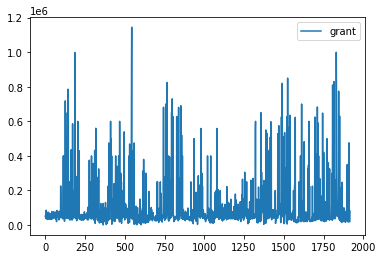

In [70]:
df.plot()

In [71]:
plt.figure(figsize=(300,150))
plt.barh(df['country'],df['grant'])
plt.xticks(rotation=90)
plt.show()



In [72]:
#here's the reason why it's so hard to plot

df['country'].nunique()

121

In [73]:
#so, instead, let's just use good old tables. 

grouped = df.groupby(['country','year'])
country_grants=(grouped['grant'].agg([np.sum]))

In [74]:
country_grants.reset_index(drop=False)

,country,year,sum
0,ALBANIA,2019,80000
1,ARMENIA,2019,1459596
2,AZERBAIJAN,2019,1075517
3,Afghanistan,2019,1987300
4,Algeria,2019,291000
...,...,...,...
119,Venezuela,2019,2613133
120,West Bank / Gaza,2019,1093085
121,XINJIANG / EAST TURKESTAN (CHINA),2019,960000
122,Yemen,2019,891714


In [75]:
country_grants.rename(columns = {'sum':'grants_total'}, inplace = True) 

In [76]:
country_grants.reset_index(drop=False, inplace=True)

In [77]:
country_grants.drop('year',axis=1,inplace=True)

In [78]:
country_grants.sort_values(by='grants_total',ascending=False).head(5)

,country,grants_total
94,Russia,7330177
11,BURMA,6421716
93,Russia,6338357
36,Europe Regional,6328910
89,Regional: Latin America & Caribbean,5959737


In [79]:
country_grants['country']=country_grants['country'].str.strip()
country_grants['country']=country_grants['country'].str.lower()

In [80]:
country_grants['Total'] = country_grants.groupby(['country'])['grants_total'].transform('sum')

In [81]:
country_grants= country_grants.drop_duplicates(subset=['country'])

In [82]:
country_grants.drop('Total',axis=1,inplace=True)
country_grants['grants_total']=country_grants['grants_total'].astype(int)/1000000

In [102]:
#having added up the years, and feeling  bit lazy( why 'regional:europe' but 
#but 'regional:europe' the next? )

# in any case, I think this simple table tells me loads where the money is going. 
#I have an itching that 'regional' and leans towards the behemoth recepiants
#that are separated and counted by themselved (i.e. russia as part of euroasia)

country_grants.rename(columns = {'grants_total':'grants_total_MILLIONS'},inplace=True)
country_grants=country_grants.sort_values(by='grants_total',ascending=False)
country_grants.reset_index(drop=True)

,country,grants_total_MILLIONS
0,burma,6.421716
1,russia,6.338357
2,europe regional,6.328910
3,regional: latin america & caribbean,5.959737
4,regional: europe,5.708373
...,...,...
115,el salvador,0.050000
116,nepal,0.050000
117,djibouti,0.048600
118,china regional,0.043000


In [103]:
df.to_csv(r'C:\Users\dccam\Desktop\export_3.csv')

In [104]:
#And I am done. There's a lot more than cold have been done with this database.
# (1) I could have aggreagated the regional information into country categories,
# (2) I could have allocated an ID number to partner and made sure that there were no more duplicates
# I did this duplication of partner via fuzzy, but a could have been more thorough. 

#(3) Finally, this data base, a bit more aggregated by country 